<a href="https://colab.research.google.com/github/archangel2006/AgroNomics/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import csv

with open("agridata.csv", "r", encoding="utf-8", errors="ignore") as infile, open("cleaned_agridata.csv", "w", newline="", encoding="utf-8") as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        try:
            writer.writerow(row)
        except:
            continue  # skip any row that causes a write error


In [ ]:
df = pd.read_csv('/content/cleaned_agridata.csv')
df.shape

(836977, 8)

In [ ]:
df.columns

Index(['commodity_name', 'state', 'district', 'market', 'min_price',
       'max_price', 'modal_price', 'date'],
      dtype='object')

In [ ]:
df['commodity_name'].unique()

array(['Ajwan', 'Alasande+Gram', 'Amaranthus', 'Amla(Nelli+Kai)',
       'Amphophalus', 'Antawala', 'Apple', 'Arhar+Dal(Tur+Dal)',
       'Ashgourd', 'Avare+Dal', 'Banana', 'Banana+-+Green',
       'Barley+(Jau)', 'Beans', 'Beaten+Rice', 'Beetroot', 'Betal+Leaves',
       'Bitter+gourd', 'Black+pepper', 'Bottle+gourd', 'Brinjal',
       'Broken+Rice', 'Cabbage', 'Capsicum', 'Cardamoms', 'Carrot',
       'Cashewnuts', 'Castor+Seed', 'Cauliflower', 'Coconut',
       'Chapparad+Avare', 'Chennangi+Dal', 'Chikoos(Sapota)', 'Chili+Red',
       'Chilly+Capsicum', 'Cloves', 'Cluster+beans', 'Cocoa',
       'Coconut+Oil', 'Coconut+Seed', 'Coffee', 'Colacasia', 'Copra',
       'Coriander(Leaves)', 'Corriander+seed', 'Cowpea(Veg)', 'Cotton',
       'Cucumbar(Kheera)', 'Cummin+Seed(Jeera)', 'Drumstick',
       'Dry+Chillies', 'Dry+Fodder', 'Dry+Grapes', 'Duster+Beans', 'Egg',
       'Elephant+Yam+(Suran)', 'Field+Pea', 'Firewood', 'Fish', 'Garlic',
       'Ghee', 'Gingelly+Oil', 'Ginger(Dry)', 'Gi

In [ ]:
# Step 1: Clean commodity names by replacing "+" with spaces and fixing weird characters
df['commodity'] = (
    df['commodity_name']
    .str.replace('+', ' ', regex=False)            # Replace all "+" with spaces
    .str.replace(r'\+\-+\+', ' ', regex=True)      # Fix patterns like "+-+" (escaped properly)
    .str.strip()                                   # Remove extra spaces
)

# Step 2: Fix known typos to standardize commodity names
typo_fixes = {
    'Soji': 'Sooji',
    'Cucumbar(Kheera)': 'Cucumber',
    'Chilly Capsicum': 'Chilli Capsicum',
    'Corriander seed': 'Coriander seed',
    'Onion Green': 'Green Onion'
}
df['commodity'] = df['commodity'].replace(typo_fixes)


In [ ]:
df['commodity'].unique()

array(['Ajwan', 'Alasande Gram', 'Amaranthus', 'Amla(Nelli Kai)',
       'Amphophalus', 'Antawala', 'Apple', 'Arhar Dal(Tur Dal)',
       'Ashgourd', 'Avare Dal', 'Banana', 'Banana - Green',
       'Barley (Jau)', 'Beans', 'Beaten Rice', 'Beetroot', 'Betal Leaves',
       'Bitter gourd', 'Black pepper', 'Bottle gourd', 'Brinjal',
       'Broken Rice', 'Cabbage', 'Capsicum', 'Cardamoms', 'Carrot',
       'Cashewnuts', 'Castor Seed', 'Cauliflower', 'Coconut',
       'Chapparad Avare', 'Chennangi Dal', 'Chikoos(Sapota)', 'Chili Red',
       'Chilli Capsicum', 'Cloves', 'Cluster beans', 'Cocoa',
       'Coconut Oil', 'Coconut Seed', 'Coffee', 'Colacasia', 'Copra',
       'Coriander(Leaves)', 'Coriander seed', 'Cowpea(Veg)', 'Cotton',
       'Cucumber', 'Cummin Seed(Jeera)', 'Drumstick', 'Dry Chillies',
       'Dry Fodder', 'Dry Grapes', 'Duster Beans', 'Egg',
       'Elephant Yam (Suran)', 'Field Pea', 'Firewood', 'Fish', 'Garlic',
       'Ghee', 'Gingelly Oil', 'Ginger(Dry)', 'Ginger(Gree

In [ ]:
commodity_to_category = {}

# Grains
for item in ['Wheat', 'Rice', 'Maize', 'Jowar(Sorghum)', 'Millets', 'Ragi (Finger Millet)', 'Rajgir',
             'Barley (Jau)', 'Broken Rice', 'Maida Atta', 'Wheat Atta', 'Kodo Millet(Varagu)', 'Beaten Rice',
             'Sooji', 'Sajje','Hybrid Cumbu', 'T.V. Cumbu', 'Lak(Teora)']:
    commodity_to_category[item] = 'Grains'

# Pulses
for item in ['Arhar Dal(Tur Dal)', 'Masur Dal', 'Moath Dal', 'Chennangi Dal', 'Green Avare (W)', 'Avare Dal',
             'Peas(Dry)', 'Peas cod', 'Peas Wet', 'Alasande Gram', 'Field Pea', 'Indian Beans (Seam)',
             'Kulthi(Horse Gram)', 'Same/Savi', 'Gram Raw(Chholia)', 'White Peas', 'Arhar (Tur/Red Gram)(Whole)',
             'Mataki','Duster Beans', 'Guar']:
    commodity_to_category[item] = 'Pulses'

# Oilseeds
for item in ['Soyabean', 'Castor Seed', 'Sunflower', 'Groundnut', 'Ground Nut Seed', 'Linseed',
             'Groundnut (Split)', 'Groundnut pods (raw)', 'Safflower', 'Taramira', 'Niger Seed (Ramtil)',
             'Gurellu']:
    commodity_to_category[item] = 'Oilseeds'

# Vegetables
for item in ['Onion', 'Potato', 'Tomato', 'Cabbage', 'Brinjal', 'Beans', 'Beetroot', 'Bitter gourd',
             'Bottle gourd', 'Capsicum', 'Cauliflower', 'Cluster beans', 'Colacasia', 'Cucumber',
             'Drumstick', 'Green Peas', 'Pumpkin', 'Raddish', 'Ridgeguard(Tori)', 'Ridge gourd(Tori)',
             'Round gourd', 'Snakeguard', 'Snake gourd', 'Sponge gourd', 'Spinach', 'Knool Khol',
             'Leafy Vegetable', 'Turnip', 'Ashgourd', 'Carrot', 'Cowpea(Veg)', 'Green Chilli',
             'Elephant Yam (Suran)', 'Suvarna Gadde', 'Tinda', 'Chow Chow', 'Season Leaves', 'Amaranthus',
             'Mashrooms', 'Mint(Pudina)', 'Methi(Leaves)', 'Thondekai', 'Seemebadnekai', 'Bunch Beans','Sweet Potato',
             'Sweet Pumpkin', 'Yam', 'Yam (Ratalu)', 'Tapioca','Green Onion', 'Surat Beans (Papadi)', 'White Pumpkin', 'Kartali (Kantola)']:
    commodity_to_category[item] = 'Vegetables'

# Fruits
for item in ['Banana', 'Mango', 'Papaya', 'Guava', 'Pomegranate', 'Apple', 'Chikoos(Sapota)', 'Grapes',
             'Litchi', 'Plum', 'Peach', 'Jamun(Narale Hannu)', 'Water Melon', 'Mousambi(Sweet Lime)',
             'Karbuja(Musk Melon)', 'Pear(Marasebu)', 'Banana - Green', 'Papaya (Raw)', 'Mango (Raw-Ripe)',
             'Pineapple', 'Orange', 'Lemon', 'Lime', 'Long Melon(Kakri)', 'Jack Fruit', 'Seetapal',
             'Persimon(Japani Fal)', 'Seetafal', 'Amla(Nelli Kai)', 'Balekai', 'Galgal(Lemon)',
             'Almond(Badam)', 'Walnut', 'Cherry', 'Kinnow']:
    commodity_to_category[item] = 'Fruits'

# Spices & Oils
for item in ['Turmeric', 'Turmeric (raw)', 'Ginger(Dry)', 'Ginger(Green)', 'Cummin Seed(Jeera)', 'Garlic',
             'Mustard', 'Mustard Oil', 'Coconut Oil', 'Gingelly Oil', 'Black pepper', 'Cardamoms', 'Cloves',
             'Nutmeg', 'Pepper garbled', 'Pepper ungarbled', 'Tamarind Seed', 'Tamarind Fruit',
             'Dry Chillies', 'Soanf', 'Suva (Dill Seed)', 'Coriander(Leaves)', 'Coriander seed',
             'Ajwan', 'Chili Red', 'Chilli Capsicum', 'Mint(Pudina)', 'Methi Seeds', 'Isabgul (Psyllium)',
             'Betal Leaves','Mace','Toria']:
    commodity_to_category[item] = 'Spices/Oils'

# Flowers (Horticulture)
for item in ['Marigold(loose)', 'Marigold(Calcutta)', 'Chrysanthemum(Loose)', 'Jasmine', 'Tube Rose(Loose)',
             'Rose(Local)','Anthorium']:
    commodity_to_category[item] = 'Flowers'

# Cash Crops
for item in ['Coffee', 'Cotton', 'Cotton Seed', 'Rubber', 'Cashewnuts', 'Copra', 'Jute', 'Tobacco',
             'Sugarcane', 'Lint', 'Paddy(Dhan)(Basmati)', 'Paddy(Dhan)(Common)','Tender Coconut',
             'Arecanut(Betelnut/Supari)', 'Honge seed', 'Bamboo']:
    commodity_to_category[item] = 'Cash Crop'



# Processed / Value-Added Products
for item in ['Gur(Jaggery)', 'Sugar', 'Dry Grapes', 'Bran', 'Gramflour']:
    commodity_to_category[item] = 'Processed'

# Fodder / Fiber / Utility Crops
for item in ['Dry Fodder', 'Green Fodder', 'Dhaincha', 'Sunhemp', 'Lukad', 'Siddota']:
    commodity_to_category[item] = 'Fodder/Fiber'

# Non-Crop (Livestock or Derived)
for item in ['Egg', 'Fish', 'Hen', 'Cow', 'Goat', 'Sheep', 'Pigs', 'Calf', 'Ox', 'Duck', 'Cock',
             'She Buffalo', 'He Buffalo', 'Bull', 'Ram', 'She Goat', 'Khoya', 'Butter', 'Ghee', 'Firewood',
             'Wood', 'Dalda']:
    commodity_to_category[item] = 'Non-Crop'

# Other
for item in ['Amphophalus', 'Antawala', 'Chapparad Avare', 'Cocoa', 'Coconut', 'Coconut Seed', 'Mahua',
             'Myrobolan(Harad)', 'Neem Seed', 'Lotus Sticks', 'Alsandikai', 'Mahedi', 'Thogrikai', 'Ambada Seed',
             'Indian Colza(Sarson)', 'Sabu Dan', 'Sabu Dana', 'Coca', 'Hippe Seed', 'Rose(Loose)']:
    commodity_to_category[item] = 'Other'


In [ ]:
df.drop(columns=['commodity_name'], inplace=True)

In [ ]:
df['category'] = df['commodity'].map(commodity_to_category)

In [ ]:
df.head()

,state,district,market,min_price,max_price,modal_price,date,commodity,category
0,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,Ajwan,Spices/Oils
1,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22,Ajwan,Spices/Oils
2,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22,Ajwan,Spices/Oils
3,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22,Ajwan,Spices/Oils
4,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22,Ajwan,Spices/Oils


In [ ]:
# Removing rows that aren't crops

df = df[df['category']!='Non-Crop']

In [ ]:
df.category.unique()

array(['Spices/Oils', 'Pulses', 'Vegetables', 'Fruits', 'Other', 'Grains',
       'Cash Crop', 'Oilseeds', 'Fodder/Fiber', 'Processed', nan,
       'Flowers'], dtype=object)

In [ ]:
# Filter and display unique commodities with missing categories
missing_category_crops = df[df['category'].isna()]['commodity'].unique()
print("Commodities with missing categories:")
print(missing_category_crops)


Commodities with missing categories:
['Other Pulses' 'its' nan]


In [ ]:
df = df[~df['commodity'].isin(['Other Pulses', 'its'])]
df = df[df['commodity'].notna()]


In [ ]:

missing_category_crops = df[df['category'].isna()]['commodity'].unique()
print("Commodities with missing categories:")
print(missing_category_crops)


Commodities with missing categories:
[]


In [ ]:
df.category.unique()

array(['Spices/Oils', 'Pulses', 'Vegetables', 'Fruits', 'Other', 'Grains',
       'Cash Crop', 'Oilseeds', 'Fodder/Fiber', 'Processed', 'Flowers'],
      dtype=object)

In [ ]:
df.sample(5)

,state,district,market,min_price,max_price,modal_price,date,commodity,category
610666,Maharashtra,Aurangabad,Aurangabad,80.0,100.0,90.00,2021-03-24,Mango,Fruits
271359,Madhya Pradesh,Shivpuri,Kolaras,30.5,36.0,33.25,2019-08-20,Soyabean,Oilseeds
653487,Uttar Pradesh,Kanpur,Kanpur(Grain),11.0,13.5,12.00,2021-03-17,Banana - Green,Fruits
307225,Haryana,Yamuna Nagar,Chhachrauli,17.0,17.0,17.00,2019-08-28,Colacasia,Vegetables
274084,Uttar Pradesh,Etah,Kasganj,8.0,9.0,8.50,2019-08-24,Bottle gourd,Vegetables


In [ ]:
# STATES

df.state.unique()

array(['Gujarat', 'Madhya Pradesh', 'Rajasthan', 'Karnataka', 'Kerala',
       'Punjab', 'Uttar Pradesh', 'Chattisgarh', 'Haryana',
       'Himachal Pradesh', 'Maharashtra', 'NCT of Delhi', 'Odisha',
       'Uttrakhand', 'West Bengal', 'Assam', 'Manipur',
       'Jammu and Kashmir', 'Meghalaya', 'Nagaland', 'Tripura',
       'Telangana', 'Tamil Nadu', 'Andhra Pradesh', 'Pondicherry',
       'Jharkhand', 'Goa', 'Mizoram', 'Andaman and Nicobar'], dtype=object)

In [ ]:
# DISTRICTS

df.district.unique()

array(['Amreli', 'Banaskanth', 'Jamnagar', 'Mehsana', 'Neemuch',
       'Chittorgarh', 'Bagalkot', 'Bangalore', 'Gadag', 'Panna',
       'Ernakulam', 'Kollam', 'Thiruvananthapuram', 'Thirssur',
       'Alappuzha', 'Kozhikode(Calicut)', 'Kasargod', 'Palakad',
       'Malappuram', 'Pathanamthitta', 'Kottayam', 'Kannur', 'Wayanad',
       'Idukki', 'Sangrur', 'Kanpur', 'Chikmagalur', 'Durg', 'Karnal',
       'Faridabad', 'Hissar', 'Bhiwani', 'Kaithal', 'Fatehabad',
       'Sonipat', 'Kurukshetra', 'Mahendragarh-Narnaul', 'Jind',
       'Panipat', 'Mandi', 'Kangra', 'Sirmore', 'Solan', 'Harda',
       'Chandrapur', 'Kolhapur', 'Nashik', 'Pune', 'Delhi', 'Mayurbhanja',
       'Faridkot', 'Ferozpur', 'Gurdaspur', 'Hoshiarpur', 'Patiala',
       'Tarntaran', 'Ajmer', 'Ganganagar', 'Udaipur', 'Agra',
       'Ambedkarnagar', 'Aligarh', 'Maharajganj', 'Banda', 'Auraiya',
       'Azamgarh', 'Badaun', 'Ballia', 'Balrampur', 'Unnao', 'Barabanki',
       'Baghpat', 'Bareilly', 'Basti', 'Mainpuri', '

In [ ]:
# MARKET

df.market.nunique()

2390

In [ ]:
# distinct market values are too less in number compared to the number of rows in dataset, so we can drop market column

df = df.drop('market', axis=1)

In [ ]:
# columns left now

df.columns

Index(['state', 'district', 'min_price', 'max_price', 'modal_price', 'date',
       'commodity', 'category'],
      dtype='object')

In [ ]:
df['date'].dtype


dtype('O')

In [ ]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='mixed',dayfirst=True)

# Extract month
df['month'] = df['date'].dt.month


In [ ]:
df['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  3,  4], dtype=int32)

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)


In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

Index(['state', 'district', 'min_price', 'max_price', 'modal_price',
       'commodity', 'category', 'month', 'season'],
      dtype='object')

In [ ]:
df.sample(3)

,state,district,min_price,max_price,modal_price,commodity,category,month,season
399635,Punjab,Gurdaspur,44.0,45.0,44.5,Onion,Vegetables,9,Post-Monsoon
391595,Uttar Pradesh,Mathura,8.6,10.5,9.7,Bottle gourd,Vegetables,9,Post-Monsoon
208491,Punjab,Hoshiarpur,24.0,29.5,27.0,Tomato,Vegetables,9,Post-Monsoon


<Axes: xlabel='modal_price'>

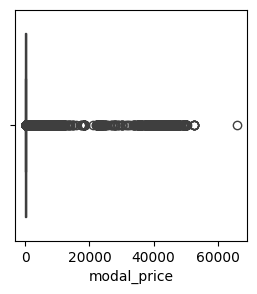

In [ ]:
import seaborn as sns

plt.figure(figsize=(3,3))
sns.boxplot(x=df['modal_price'])

In [ ]:
Q1 = df['modal_price'].quantile(0.25)
Q3 = df['modal_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['modal_price'] < lower_bound) | (df['modal_price'] > upper_bound)]
print(len(outliers), "out of", len(df), "rows")



52574 out of 834674 rows


In [ ]:
df = df[(df['modal_price'] >= lower_bound) & (df['modal_price'] <= upper_bound)]


In [ ]:
df.shape

(782100, 9)

DEFINING FEATURES

In [ ]:
target = 'modal_price'
features = ['state', 'district', 'commodity', 'category', 'month', 'season']


ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in ['state', 'district', 'commodity', 'category', 'season']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


TRAIN - TEST - SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encoded[features]
y = df_encoded[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


MODEL DEVELPMENT

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

MODEL EVALUATION

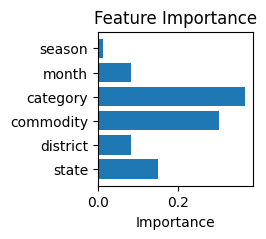

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
importances = model.feature_importances_
feat_names = x.columns

plt.barh(feat_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 3.6820849315942494
RMSE: 39.03405458896472
R² Score: 0.8738641476195124


In [ ]:
df['modal_price'].describe()

,modal_price
count,782100.000000
mean,26.818152
std,17.574838
min,0.000000
25%,13.700000
50%,21.000000
75%,36.270000
max,81.350000


<Axes: xlabel='modal_price', ylabel='Count'>

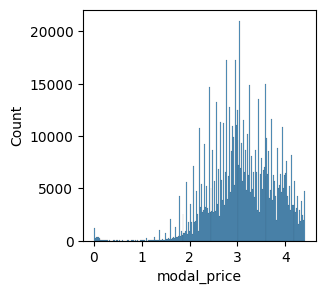

In [ ]:
import numpy as np

plt.figure(figsize=(3,3))
sns.histplot(np.log1p(df['modal_price']))

In [ ]:
df['log_modal_price'] = np.log1p(df['modal_price'])


In [ ]:
df.sample(3)

,state,district,min_price,max_price,modal_price,commodity,category,month,season,log_modal_price
445621,Punjab,Gurdaspur,12.00,18.00,15.00,Cauliflower,Vegetables,12,Winter,2.772589
327019,Gujarat,Rajkot,31.35,31.35,31.35,Soyabean,Oilseeds,10,Post-Monsoon,3.476614
59087,Punjab,Ferozpur,20.00,25.00,22.50,Colacasia,Vegetables,6,Monsoon,3.157000


In [ ]:
x = df[['commodity', 'state', 'district', 'category', 'month', 'season']]
y = df['log_modal_price']



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['commodity', 'state', 'district', 'category', 'season']
numerical_cols = ['month']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numerical_cols)
])



In [ ]:
print(x.columns)

Index(['commodity', 'state', 'district', 'category', 'month', 'season'], dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=20,     # fewer trees
        max_depth=10,        # shallower trees
        n_jobs=-1,           # use all available cores
        random_state=42,
        verbose=0           # 1 shows training progress
    ))
])


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model.fit(x_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['commodity', 'state',
                                                   'district', 'category',
                                                   'season']),
                                                 ('num', 'passthrough',
                                                  ['month'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=20, n_jobs=-1,
                                       random_state=42))])

In [ ]:
from numpy import expm1

y_pred_log = model.predict(x_test)
y_pred_actual = expm1(y_pred_log)
y_test_actual = expm1(y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 7.2166285705785285
RMSE: 10.847218986713491
R² Score: 0.619782854516707
